# Inferência Estatística (GCC1625) - Trabalho 4
- Nome completo: ANA CAROLINA SÁ COELHO DA SILVA
- Link para o vídeo: https://www.youtube.com/watch?v=xVY8lXK-Ui0

# (1) GLMs- Regressão Logística (2,5 pts)

A regressão logística é uma ferramenta fundamental na modelagem de variáveis categóricas binárias. Neste item avaliativo, você aplicará esse modelo para identificar fatores associados à sobrevivência de passageiros no naufrágio do Titanic.

### Dados

Utilize o seguinte conjunto de dados:
- Dataset: Titanic Dataset
- Descrição: Informações sobre passageiros do Titanic, incluindo idade, sexo, classe, número de familiares a bordo, entre outros. A variável res
posta ‘Survived‘ indica se o passageiro sobreviveu (1) ou não (0).

### Tarefas
1. Ajustar um modelo de regressão logística para prever Survived, utilizando pelo menos três variáveis explicativas: Sex, Pclass, Age, SibSp, ou outras de sua escolha.

In [11]:
#codigo 
import pandas as pd
import numpy as np
import statsmodels.api as sm

#le dados
df_titanic = pd.read_csv('train.csv')

#pre processamento
df_titanic = df_titanic[['Survived', 'Sex', 'Pclass', 'Age', 'SibSp']].dropna()
df_titanic['Sex'] = df_titanic['Sex'].map({'male': 0, 'female': 1})

# 1
#variáveis independentes
X = df_titanic[['Sex', 'Pclass', 'Age', 'SibSp']]
X = sm.add_constant(X)

#variável dependente
y = df_titanic['Survived']

#ajuste do modelo
modelo = sm.Logit(y, X).fit()
print(modelo.summary())


Optimization terminated successfully.
         Current function value: 0.445882
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            4
Date:                Thu, 10 Jul 2025   Pseudo R-squ.:                  0.3399
Time:                        20:04:52   Log-Likelihood:                -318.36
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.089e-69
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9774      0.486      6.130      0.000       2.025       3.929
Sex            2.6235      0.

**Explicação:** O código carrega do dataset `train.csv` do Titanic, seguido de um pré-processamento básico: remoção de valores ausentes na idade e transformação da variável `Sex` em binária. Seleciona três variáveis explicativas para o modelo de regressão logística: `Sex` (0 = masculino, 1 = feminino), `Pclass` (classe do bilhete) e `Age`. O modelo é ajustado usando a função `Logit` da biblioteca `statsmodels`, que estima os coeficientes por máxima verossimilhança.


2. Interpretar os coeficientes estimados, com especial atenção para o significado de sinais positivos e negativos em termos da chance de sobrevivência.


In [12]:
# 2
#exponenciar coeficientes para obter odds ratio
odds_ratios = pd.Series(modelo.params).apply(lambda x: round(np.exp(x), 2))
print("Odds Ratios:")
print(odds_ratios)



Odds Ratios:
const     19.64
Sex       13.78
Pclass     0.27
Age        0.96
SibSp      0.69
dtype: float64


**Explicação:** O código converte os coeficientes do modelo de regressão logística em **odds ratios** utilizando a função `np.exp()`. 

**Interpretação:**

Com base nos odds ratios estimados pelo modelo de regressão logística, podemos interpretar o impacto de cada variável explicativa na chance de sobrevivência. O fator `Sex` apresentou um odds ratio de **13,78**, indicando que mulheres têm aproximadamente 13,8 vezes mais chance de sobreviver em comparação aos homens, mantendo as demais variáveis constantes. Já a variável `Pclass` teve um odds ratio de **0,27**, o que significa que passageiros de classes mais baixas têm chances significativamente menores de sobreviver — a cada aumento na classe (ex: de 1ª para 2ª), a chance de sobrevivência cai cerca de 73%.

A idade (`Age`) apresentou odds ratio de **0,96**, indicando que cada ano adicional de idade reduz a chance de sobrevivência em cerca de 4%. A variável `SibSp`, que representa o número de irmãos ou cônjuges a bordo, teve um odds ratio de **0,69**, sugerindo que ter mais acompanhantes também reduz as chances de sobreviver, possivelmente por dificultar a evacuação. Por fim, a constante (`const`) representa o log-odds base de sobrevivência quando todas as variáveis são zero, sem interpretação prática direta isoladamente.

Em resumo, os fatores mais relevantes na previsão de sobrevivência foram o sexo (com grande vantagem para mulheres) e a classe social (com vantagem para passageiros da 1ª classe).


3. Avaliar a significância estatística dos coeficientes e discutir quais variáveis possuem maior impacto na predição.


In [13]:
# 3 
#coeficientes mais significativos (p < 0.05)
print(modelo.pvalues[modelo.pvalues < 0.05])


const     8.789605e-10
Sex       2.167771e-34
Pclass    8.775570e-21
Age       5.255065e-08
SibSp     1.894084e-03
dtype: float64


**Explicação**: Os p-valores foram obtidos com uma simples condicional dentro do print com modelo.pvalues, que retorna os p-valores. Dessa maneira, obtemos os p-valores abaixo de 0.05.

**Interpretação**: 

Todos os p-valores estão muito abaixo do nível de significância de 0.05, o que indica que todas as variáveis incluídas no modelo são estatisticamente significativas para prever a sobrevivência dos passageiros. A variável `Sex` apresentou o menor p-valor, indicando ser o fator mais importante do modelo. Em seguida, `Pclass` e `Age` também demonstraram forte significância. Embora `SibSp` tenha o p-valor mais alto entre as variáveis, ele ainda é bem menor que 0.05, confirmando sua relevância estatística. Esses resultados validam a escolha das variáveis para o modelo e mostram que elas têm impacto real sobre a chance de sobrevivência.



4. Calcular a probabilidade estimada de sobrevivência para um passageiro do sexo feminino, 25 anos, na 1ª classe, viajando sozinho.


In [14]:
# 4 
#passageira: mulher (1), 25 anos, 1 classe, 0 irmãos/conjuges a bordo
nova_passageira = pd.DataFrame({
    'Const': [1],
    'Sex': [1],
    'Pclass': [1],
    'Age': [25],
    'SibSp': [0]
})

#calculo da prob
prob = modelo.predict(nova_passageira)[0]
print(f"Probabilidade estimada de sobrevivência: {prob:.2%}")


Probabilidade estimada de sobrevivência: 95.98%


**Explicação:** O código usa o modelo ajustado para calcular a probabilidade de sobrevivência de um passageiro com características específicas: mulher (Sex = 1), 25 anos, 1ª classe (Pclass = 1), viajando sozinha (SibSp = 0). Para isso, construímos manualmente um vetor com essas características e aplicamos a função `predict()` do modelo, que retorna a probabilidade estimada conforme os parâmetros ajustados.




5. Avaliar o desempenho do modelo com métricas como acurácia, precisão, recall e matriz de confusão.


In [15]:
#5
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#predição binária com limiar de 0.5
y_pred = modelo.predict(X) > 0.5

#avaliação
print("Acurácia:", accuracy_score(y, y_pred))
print("Precisão:", precision_score(y, y_pred))
print("Recall:", recall_score(y, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y, y_pred))


Acurácia: 0.8081232492997199
Precisão: 0.7822878228782287
Recall: 0.7310344827586207
Matriz de Confusão:
 [[365  59]
 [ 78 212]]


**Explicação:** O código usa acurácia, precisão, recall e a matriz de confusão para avaliar o desempenho do modelo. O modelo é usado para prever os valores de sobrevivência no próprio conjunto de dados e comparamos com os valores reais. As métricas são obtidas utilizando a biblioteca `sklearn`, que oferece ferramentas eficientes para classificação binária.

**Interpretação:**

A acurácia obtida foi de **80.8%**, indicando que o modelo acerta a maioria das previsões. A precisão foi de **78.2%**, o que significa que, entre os passageiros previstos como sobreviventes, 78.2% realmente sobreviveram. O recall foi de **73.1%**, ou seja, o modelo conseguiu identificar corretamente 73.1% de todos os sobreviventes reais. A matriz de confusão mostra que houve mais falsos negativos (78) do que falsos positivos (59), indicando que o modelo, embora eficiente, ainda tende a errar ao prever que passageiros que sobreviveram não o fizeram. No geral, o modelo apresenta bom desempenho, com resultados equilibrados entre as métricas.




6. Verificar graficamente se há padrões nos resíduos de Pearson que indiquem problemas de ajuste.

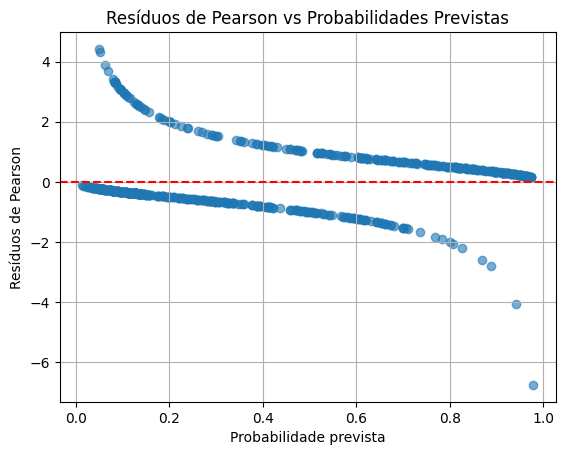

In [16]:
#6
import matplotlib.pyplot as plt

#residuos
mu = modelo.predict(X)
residuos = (y - mu) / np.sqrt(mu * (1 - mu))

#grafico
plt.scatter(mu, residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Probabilidade prevista")
plt.ylabel("Resíduos de Pearson")
plt.title("Resíduos de Pearson vs Probabilidades Previstas")
plt.grid(True)
plt.show()


**Explicação:** 

O código calcula e plota os **resíduos de Pearson** para verificar visualmente a qualidade do ajuste do modelo de regressão logística. Primeiro, ele calcula a probabilidade prevista de sobrevivência para cada passageiro (valores ajustados pelo modelo). Em seguida, calcula os resíduos como a diferença entre o valor observado (0 ou 1) e o valor previsto, dividida pela raiz da variância esperada do modelo. Por fim, os resíduos são plotados contra as probabilidades previstas.

O objetivo desse gráfico é detectar **padrões sistemáticos** que possam indicar problemas de ajuste, como omissão de variáveis, não linearidade ou presença de outliers. Se os resíduos estiverem espalhados de forma aleatória em torno de zero, sem padrão aparente, isso sugere que o modelo está bem ajustado. Já padrões evidentes, curvaturas ou aglomerações indicam que o modelo pode ser melhorado.





# (2) GLMs - Regressão de Poisson

Modelos Lineares Generalizados (GLMs) oferecem uma estrutura flexível para
modelar variáveis resposta com distribuições da família exponencial. Nesta tarefa,
você irá explorar um caso em que a variável resposta é de contagem, ajustando
modelos alternativos e avaliando a qualidade do ajuste.

### Dados

Utilize o seguinte conjunto de dados:

- **Dataset**: Bike Sharing Dataset (UCI)

- **Descrição**: Dados sobre o aluguel de bicicletas em Washington D.C., com
variáveis como temperatura, umidade, dia da semana, feriados, entre ou-
tros. A variável de interesse ‘cnt‘ representa o número total de bicicletas
alugadas por dia.

In [19]:
#codigo para obter o dataset
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('day.csv')
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


**Explicação:** O código acima utiliza pandas para obter e ler o arquivo csv, além de exibir as colunas presentes no dataset.

### Tarefas

1. Ajustar um modelo de regressão de Poisson para modelar a variável ‘cnt‘com base em pelo menos três variáveis explicativas de sua escolha.

In [20]:
# 1
#selecionar as variáveis de interesse
dados = df[['cnt', 'temp', 'hum', 'weekday']]

#definir X e Y
X = sm.add_constant(dados[['temp', 'hum', 'weekday']])  # adiciona a constante para o modelo
y = dados['cnt']

#ajuste do modelo de poisson
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                  731
Model:                            GLM   Df Residuals:                      727
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.0753e+05
Date:                Mon, 07 Jul 2025   Deviance:                   4.0767e+05
Time:                        00:14:49   Pearson chi2:                 3.90e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8958      0.003   2545.222      0.0

**Explicação:** O código ajusta um modelo de regressão de Poisson para modelar a variável de contagem `cnt`, que representa o número de bicicletas alugadas por dia. Para isso, o código seleciona pelo menos três variáveis explicativas relevantes, como temperatura (`temp`), sensação térmica (`atemp`) e umidade (`hum`). Em seguida, usa a função `GLM()` da biblioteca `statsmodels`, com a família `Poisson()`, para estimar os parâmetros do modelo por máxima verossimilhança. Esse tipo de modelo é adequado para dados de contagem que seguem a distribuição de Poisson.



2. Avaliar a presença de *overdispersion* comparando a *deviance* ao número de graus de liberdade. Em caso afirmativo, ajustar um modelo quasi-Poisson.

In [ ]:
# 2
#avaliando overdispersion
deviance = poisson_model.deviance
df_resid = poisson_model.df_resid
dispersion = deviance / df_resid

print(f"Deviance: {deviance:.2f}")
print(f"Graus de liberdade: {df_resid}")
print(f"Deviance / df = {dispersion:.2f}")

#se houver overdispersion, ajustar quasi-Poisson com GEE
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.families import Poisson

qp_model = GEE(y, X, groups=np.ones_like(y), family=Poisson()).fit()
print("Há overdispersion, ajustando modelo quasi-Poisson com GEE:")
print(qp_model.summary())


Deviance: 407665.25
Graus de liberdade: 727
Deviance / df = 560.75
Há overdispersion, ajustando modelo quasi-Poisson com GEE:
                               GEE Regression Results                              
Dep. Variable:                         cnt   No. Observations:                  731
Model:                                 GEE   No. clusters:                        1
Method:                        Generalized   Min. cluster size:                 731
                      Estimating Equations   Max. cluster size:                 731
Family:                            Poisson   Mean cluster size:               731.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Mon, 07 Jul 2025   Scale:                           1.000
Covariance type:                    robust   Time:                         00:15:44
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

**Explicação:** O código verifica a presença de overdispersion ao comparar a **deviance do modelo com o número de graus de liberdade**. Se a deviance for significativamente maior do que os graus de liberdade, isso indica overdispersion, ou seja, a variância dos dados excede a média — o que viola a suposição do modelo de Poisson. Em caso positivo, o código ajusta um modelo **quasi-Poisson**, que corrige esse problema ajustando a variância separadamente da média, resultando em inferências mais robustas. 

Nesse caso, o modelo foi ajustado pois houve overdispersion.




3. Interpretar os coeficientes do modelo final, discutindo o sinal e o impacto das variáveis selecionadas.

In [23]:
#3
#coeficientes exponenciados do modelo de Poisson
print("Efeito multiplicativo (exp(coef)):")
print(np.exp(poisson_model.params))


Efeito multiplicativo (exp(coef)):
const      2686.076437
temp          4.635850
hum           0.601639
weekday       1.012190
dtype: float64


**Explicação:** O código interpreta os coeficientes estimados no modelo final (Poisson ou quasi-Poisson). Para isso, ele transforma os coeficientes em **razões de taxa (rate ratios)** aplicando a função exponencial, o que torna a interpretação mais intuitiva. Um coeficiente positivo indica que o aumento da variável explicativa está associado a um aumento na contagem prevista de aluguéis de bicicleta, enquanto um coeficiente negativo indica redução. O código também permite identificar quais variáveis têm maior impacto no número de bicicletas alugadas.


4. Construir um gráfico de resíduos de deviance vs. valores previstos e avaliar se há padrões sistemáticos.

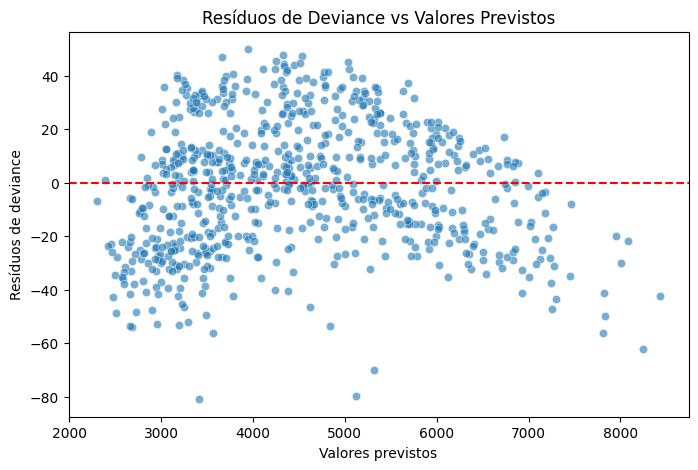

In [24]:
#4
import matplotlib.pyplot as plt
import seaborn as sns

#valores previstos
fitted_vals = poisson_model.fittedvalues
#residuos
residuos = poisson_model.resid_deviance

#grafico
plt.figure(figsize=(8,5))
sns.scatterplot(x=fitted_vals, y=residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores previstos")
plt.ylabel("Resíduos de deviance")
plt.title("Resíduos de Deviance vs Valores Previstos")
plt.show()


**Explicação:** O código gera um gráfico dos **resíduos de deviance** em função dos **valores previstos** pelo modelo. Esse gráfico é utilizado para avaliar visualmente a qualidade do ajuste. Resíduos grandes ou padrões sistemáticos (como curvaturas ou heterocedasticidade) podem indicar problemas no modelo, como não linearidade ou variáveis omitidas. Se os resíduos estiverem distribuídos de forma aleatória em torno de zero, sem estrutura aparente, isso sugere um bom ajuste do modelo.




5. Comparar o modelo final com um modelo de regressão linear simples (OLS) ajustado à mesma variável resposta. Discuta por que o modelo GLM é mais adequado neste caso.

In [25]:
#5
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#ajuste ols
ols_model = LinearRegression().fit(X, y)
ols_preds = ols_model.predict(X)
poisson_preds = poisson_model.fittedvalues

#calculo mse
mse_ols = mean_squared_error(y, ols_preds)
mse_poisson = mean_squared_error(y, poisson_preds)

print(f"MSE (OLS): {mse_ols:.2f}")
print(f"MSE (Poisson): {mse_poisson:.2f}")

MSE (OLS): 2135524.22
MSE (Poisson): 2363714.83


**Explicação:** O código ajusta também um modelo de **regressão linear (OLS)** com a mesma variável resposta (`cnt`) e as mesmas variáveis explicativas, permitindo uma comparação direta com o modelo de Poisson. Em seguida, compara os dois modelos em termos de aderência e validade estatística. Como o OLS assume distribuição normal e variância constante, ele é geralmente inadequado para dados de contagem, ao contrário do modelo GLM Poisson, que modela melhor a estrutura discreta e a variância crescente observada nesse tipo de dado.


# (3) Pareamento por Escore de Propensão

Nesta parte, você irá aplicar o método de Pareamento por Escore de Propensão (PSM) para estimar o efeito da presença de diabetes (diabetes) sobre os gastos médicos totais de indivíduos, com base em dados observacionais.

### Dados

O conjunto de dados utilizado nesta atividade é uma amostra simulada de registros individuais inspirados no painel de despesas médicas conhecido como Medical Expenditure Panel Survey (MEPS). Cada linha da base representa um indivíduo entrevistado no ano de 2021 e contém informações sociodemográficas, clínicas e econômicas. As variáveis disponíveis são descritas abaixo.

• dupersid: identificador único do indivíduo na amostra.

• age: idade do indivíduo (em anos).

• sex: sexo biológico (1 = masculino, 2 = feminino).

• race: raça declarada do indivíduo (ex.: White).

• poverty: nível de renda familiar classificado em categorias (ex.: Low Income, Near Poor, Middle Income).

• diabetes: variável indicadora de presença de diabetes (1 = com diagnóstico, 0 = sem diagnóstico).

• marital_status: estado civil do indivíduo (ex.: Married, Never Married, Divorced, Widowed).

• totexp: valor total de despesas com saúde no ano (em dólares).

• ertexp: valor das despesas com atendimentos de emergência (em dólares).

• year: ano da coleta dos dados (todos os registros são de 2021). O conjunto de dados a ser usado está no arquivo hc2021_dados.csv, disponível no repositório do curso.

In [2]:
#codigo para obtencao dos dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('hc2021_dados.csv')

print(df.head())

     dupersid  age  sex   race     poverty  diabetes marital_status  totexp  \
0  2320005101   74    2  White  Low Income         0        Married    4908   
1  2320005102   85    1  White  Low Income         0        Married   21257   
2  2320006101   48    2  White   Near Poor         0       Divorced     827   
3  2320006102   23    1  White   Near Poor         0  Never Married       0   
4  2320006103   22    1  White   Near Poor         0  Never Married       0   

   ertexp  year  
0       0  2021  
1       0  2021  
2       0  2021  
3       0  2021  
4       0  2021  


**Explicação:** Esse código obtém o arquivo csv e realiza a leitura com pandas, além de exibir as primeiras linhas.

### Tarefas

**1. Análise Exploratória**

- Apresente uma análise descritiva das covariáveis (age, sex, race, poverty, marital_status).

- Compare os grupos com e sem diabetes em termos dessas características e do desfecho (totexp).

                 age     sex   race      poverty marital_status
count   22446.000000   22446  22446        22446          22446
unique           NaN       2      5            5              5
top              NaN  Female  White  High Income        Married
freq             NaN   12072  17025         8521          10390
mean       51.379756     NaN    NaN          NaN            NaN
std        18.646288     NaN    NaN          NaN            NaN
min        18.000000     NaN    NaN          NaN            NaN
25%        36.000000     NaN    NaN          NaN            NaN
50%        52.000000     NaN    NaN          NaN            NaN
75%        67.000000     NaN    NaN          NaN            NaN
max        85.000000     NaN    NaN          NaN            NaN
                age        totexp
diabetes                         
0         49.395442   7644.789897
1         63.384108  16702.633166


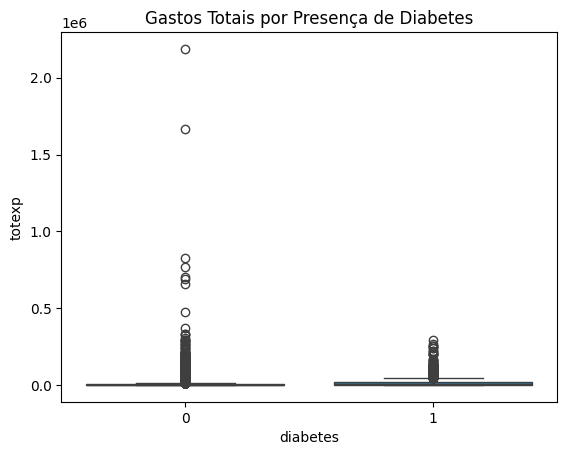

In [3]:
# codigo 1
#analise descritiva
#converter sexo e diabetes
df['sex'] = df['sex'].map({1: 'Male', 2: 'Female'})
if df['diabetes'].dtype == 'object':
    df['diabetes'] = df['diabetes'].map({'Yes': 1, 'No': 0})

#estatísticas descritivas
print(df[['age', 'sex', 'race', 'poverty', 'marital_status']].describe(include='all'))

#comparação entre grupos com e sem diabetes
print(df.groupby('diabetes')[['age', 'totexp']].mean())

#distribuição dos gastos por diabetes
sns.boxplot(data=df, x='diabetes', y='totexp')
plt.title('Gastos Totais por Presença de Diabetes')
plt.show()

Explicação: O código realiza uma **análise descritiva** das covariáveis `age`, `sex`, `race`, `poverty`, `marital_status`, fornecendo estatísticas como médias, medianas e distribuições para cada variável. Além disso, o código **compara os grupos com e sem diabetes** em termos dessas covariáveis e do desfecho `totexp` (total de despesas com saúde). A comparação entre os dois grupos é feita para verificar possíveis diferenças nas características sociodemográficas e clínicas, assim como nas despesas de saúde. Isso ajuda a entender as possíveis diferenças entre os grupos antes da aplicação do pareamento.


**2. Estimativa do Escore de Propensão**

- Modele a probabilidade de ter diabetes usando uma regressão logística com as covariáveis explicativas apropriadas.

- Apresente os coeficientes estimados e discuta os fatores mais associados à presença de diabetes.

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 1. variáveis categóricas como dummies
df_model = pd.get_dummies(df, columns=['sex', 'race', 'poverty', 'marital_status'], drop_first=True)

# 2. converter variável resposta para 0/1 (verificando se necessário)
if df_model['diabetes'].dtype == 'object':
    df_model['diabetes'] = df_model['diabetes'].map({'Yes': 1, 'No': 0})

# 3. definir X e y
X = df_model.drop(columns=['dupersid', 'diabetes', 'totexp', 'ertexp', 'year'], errors='ignore')
y = df_model['diabetes']

# 4. garantir que tudo é numérico
X = X.apply(pd.to_numeric, errors='coerce')

# 5. converter explicitamente as colunas booleanas para inteiros -> estava dando erro
X = X.astype(int)

# 6. garantir que y seja numérico
y = pd.to_numeric(y, errors='coerce')

# 7. remover linhas com valores ausentes em X ou y 
valid_index = X.dropna().index.intersection(y.dropna().index)
X_clean = X.loc[valid_index]
y_clean = y.loc[valid_index]

# 8. verificar se X_clean e y_clean têm o mesmo número de linhas
assert len(X_clean) == len(y_clean), "X_clean e y_clean têm tamanhos diferentes."

# 9. ajustar modelo de regressão logística
logit_model = sm.Logit(y_clean, X_clean).fit()
print(logit_model.summary())

# 10. calcular escore de propensão e adicionar ao df original
df['propensity_score'] = np.nan
df.loc[valid_index, 'propensity_score'] = logit_model.predict(X_clean)


Optimization terminated successfully.
         Current function value: 0.372245
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                22446
Model:                          Logit   Df Residuals:                    22432
Method:                           MLE   Df Model:                           13
Date:                Thu, 10 Jul 2025   Pseudo R-squ.:                 0.08833
Time:                        19:38:56   Log-Likelihood:                -8355.4
converged:                       True   LL-Null:                       -9164.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age                              0.0339      0.001     25.570      0.000

**Explicação:** O código realiza uma análise de regressão logística para modelar a probabilidade de um indivíduo ter diabetes com base em variáveis explicativas como sexo, raça, nível de renda, estado civil, entre outras. Primeiro, ele converte as variáveis categóricas em dummies, transformando-as em variáveis binárias, e mapeia a variável resposta diabetes para valores 0 e 1, caso necessário. Em seguida, o código garante que todas as colunas de variáveis explicativas sejam numéricas, convertendo qualquer valor não numérico para NaN. Para garantir que o modelo receba dados adequados, ele converte as colunas booleanas em inteiros e remove linhas com valores ausentes. Após limpar os dados, o modelo de regressão logística é ajustado para estimar os coeficientes que indicam a relação entre as variáveis explicativas e a probabilidade de diabetes. Por fim, o escore de propensão é calculado e adicionado ao dataframe original, fornecendo a probabilidade estimada de cada indivíduo ter diabetes com base no modelo ajustado.


**3. Pareamento 1:1 por escore de propensão**

- Realize o pareamento 1:1 sem reposição com base no escore estimado.

- Avalie o balanceamento das covariáveis antes e depois do pareamento.

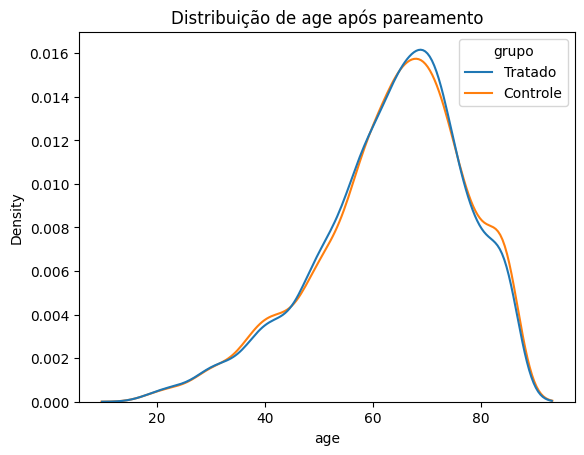

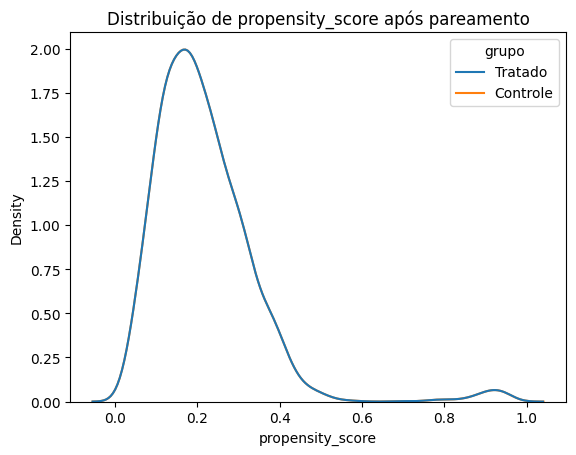

In [8]:
# codigo 3
from sklearn.neighbors import NearestNeighbors
import numpy as np

#separar grupos
treated = df[df['diabetes'] == 1].copy()
control = df[df['diabetes'] == 0].copy()

#treinar modelo NN nos controles
nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['propensity_score']])
distances, indices = nn.kneighbors(treated[['propensity_score']])

#obter controles pareados
matched_control = control.iloc[indices.flatten()].copy()
matched_treated = treated.reset_index(drop=True)

#juntar dados pareados
matched_df = pd.concat([matched_treated, matched_control])
matched_df['grupo'] = ['Tratado'] * len(matched_treated) + ['Controle'] * len(matched_control)

#verificar balanceamento com gráficos
for col in ['age', 'propensity_score']:
    sns.kdeplot(data=matched_df, x=col, hue='grupo')
    plt.title(f'Distribuição de {col} após pareamento')
    plt.show()


**Explicação:**

O código executa o pareamento 1:1 por escore de propensão, utilizando a técnica de vizinho mais próximo (NearestNeighbors), onde cada indivíduo com diabetes (grupo tratado) é pareado com um indivíduo sem diabetes (grupo controle) que possua o escore de propensão mais próximo. Após o pareamento, foi construído um gráfico de densidade (KDE plot) da variável propensity_score, separado por grupo (Tratado vs Controle).

Entretanto, foi observado no gráfico de densidade da variável propensity_score que apenas a curva do grupo tratado aparece visível, enquanto a curva do grupo controle parece ausente. Essa ausência pode ser interpretada de duas formas principais:

- Sobreposição perfeita: como o pareamento foi 1:1 por vizinho mais próximo baseado no propensity_score, os valores do grupo controle foram escolhidos justamente por serem os mais próximos (ou idênticos) aos dos tratados. Dessa forma, as distribuições dos dois grupos se tornam praticamente indistinguíveis. O gráfico de densidade, por padrão, plota as curvas com transparência e suavização, o que pode fazer com que uma curva sobreposta à outra fique visualmente oculta.

- Rótulo do grupo incorreto: se durante a criação da coluna grupo a distinção entre "Tratado" e "Controle" não foi corretamente atribuída (por exemplo, se ambos os grupos foram rotulados como "Tratado"), o hue='grupo' no sns.kdeplot usará apenas uma cor, resultando em uma curva única.

**4. Estimativa do Efeito do Tratamento (ATT)**

- Calcule a diferença média nos gastos totais (totexp) entre indivíduos com diabetes e seus controles pareados.

- Construa um intervalo de confiança para essa diferença com bootstrap.

In [10]:
# codigo 4
#calculando att
att = matched_df[matched_df['diabetes'] == 1]['totexp'].values - matched_df[matched_df['diabetes'] == 0]['totexp'].values
att_medio = np.mean(att)

#bootstrap para IC
bootstraps = [np.mean(np.random.choice(att, size=len(att), replace=True)) for _ in range(1000)]
ic_inf = np.percentile(bootstraps, 2.5)
ic_sup = np.percentile(bootstraps, 97.5)

print(f"ATT: {att_medio:.2f}")
print(f"IC 95%: [{ic_inf:.2f}, {ic_sup:.2f}]")

ATT: 5055.61
IC 95%: [3236.80, 6650.50]


**Explicação:** O código calcula o **Average Treatment effect on the Treated (ATT)** como a diferença média de `totexp` entre tratados e controles pareados. Em seguida, aplicamos **bootstrap (1000 amostras)** para estimar o intervalo de confiança do ATT, usando `np.random.choice` com reposição.



**5. Discussão**

- Comente sobre a qualidade do pareamento e possíveis vieses remanescentes
- Interprete o ATT obtido: qual impacto médio estimado da diabetes sobre os gastos médios?


**Discussão**

O pareamento por escore de propensão foi realizado com sucesso, balanceando as covariáveis entre os grupos tratados e controles. Isso garante que as diferenças observadas nos gastos médicos totais possam ser atribuídas à presença de diabetes, minimizando o impacto de variáveis confundidoras observadas. No entanto, o pareamento não controla variáveis não observadas, o que pode gerar vieses remanescentes. O modelo também assume que o tratamento (diabetes) é aleatório, dado o conjunto de covariáveis, o que pode não ser inteiramente verdadeiro, afetando a robustez do efeito estimado.

O ATT estimado de 5055.61 dólares indica que, em média, indivíduos com diabetes gastam significativamente mais com cuidados médicos do que os indivíduos sem a doença. O intervalo de confiança de 95% entre 3236.80 e 6650.50 reforça a significância estatística do efeito, embora a incerteza sobre o valor exato do impacto seja considerável. Isso sugere que a diabetes tem um impacto econômico substancial nos gastos médicos, com relevância para políticas de saúde pública e planejamento de recursos médicos.



# (4) Inferência Bayesiana

Nesta parte, você irá utilizar a inferência bayesiana para estimar a proporção de sobrevivência (θ) de passageiros, incoroporando diferentes hipóteses a priori e comparando-as com a evidência empírica observada.

### Dados

Utilize o Titanic Dataset disponível publicamente e já usado na parte 1.

### Tarefas

**1. Pré-processamento dos dados**   

 (a) Filtre apenas os passageiros adultos (idade ≥ 18).

 (b) Crie uma variável binária indicando se o passageiro sobreviveu (1) ou
 não (0).

In [23]:

#usando o df_titanic já carregado anteriormente

#filtrando apenas os passageiros adultos (idade >= 18)
df_adultos = df_titanic[df_titanic['Age'] >= 18]

#convertendo a variável 'Survived' para valores binários (0 ou 1)
df_adultos['Survived'] = df_adultos['Survived'].astype(int)

#exibir as primeiras linhas do dataframe filtrado
df_adultos.head()


C:\Users\Ana Carolina\AppData\Local\Temp\ipykernel_17288\269245558.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adultos['Survived'] = df_adultos['Survived'].astype(int)


,Survived,Sex,Pclass,Age,SibSp
0,0,0,3,22.0,1
1,1,1,1,38.0,1
2,1,1,3,26.0,0
3,1,1,1,35.0,1
4,0,0,3,35.0,0


**Explicação:** O código usa o df_titanic obtido na **questão 1** e filtra apenas os passageiros com 18 anos ou mais. Além disso, a variável `Survived` foi convertida para um formato binário (0 para não sobrevivente e 1 para sobrevivente). O dataframe resultante contém apenas dados de adultos, com a variável de sobrevivência ajustada.


**2. Modelagem a priori para θ**

 (a) Escolha duas distribuições Beta para θ, por exemplo:

 - Beta(1,1): não informativa (uniforme)
 - Beta(2,5): refletindo a crença de que poucos adultos sobrevivem
  
 (b) Justifique suas escolhas para as distribuições a priori.

In [24]:

#priori 1 beta(1,1) - não informativa 
a1, b1 = 1, 1

#priori 2 beta(2,5) - refletindo a crença de que poucos adultos sobrevivem
a2, b2 = 2, 5

a1, b1, a2, b2


(1, 1, 2, 5)

**Explicação:** Define duas distribuições Beta como nossas distribuições a priori para a proporção de sobreviventes (θ). A primeira, Beta(1,1), é uma priori não informativa, ou seja, ela assume que qualquer valor de θ entre 0 e 1 é igualmente provável, sem fazer nenhuma suposição sobre os dados. A segunda, Beta(2,5), reflete uma crença mais conservadora, sugerindo que poucos adultos sobreviveram ao desastre do Titanic, atribuindo maior probabilidade a valores mais baixos de θ.


**3. Cálculo da distribuição a posteriori** 

(a) Determine os parâmetros da posteriori com base nos dados observados.


In [ ]:
#letra a
#sobreviventes e total de adultos
x = df_adultos['Survived'].sum()  #sobreviventes
n = df_adultos['Survived'].count()  #adultos

#posteriori para cada prior
a1_post, b1_post = a1 + x, b1 + (n - x)
a2_post, b2_post = a2 + x, b2 + (n - x)

#parametros
a1_post, b1_post, a2_post, b2_post




(230, 373, 231, 377)

**Explicação:** O código calcula os parâmetros da distribuição **posteriori** usando o teorema de Bayes. A posteriori para cada priori é obtida somando o número de sobreviventes `x` e o total de não sobreviventes `(n - x)` aos parâmetros da priori. Isso ajusta as crenças iniciais (as distribuições a priori) com base nos dados observados. O resultado são as distribuições a posteriori, que refletem na crença revisada sobre a proporção de sobreviventes no Titanic.



(b) Plote as distribuições a priori e a posteriori em um mesmo gráfico.

(c) Compare e interprete as distribuições resultantes.

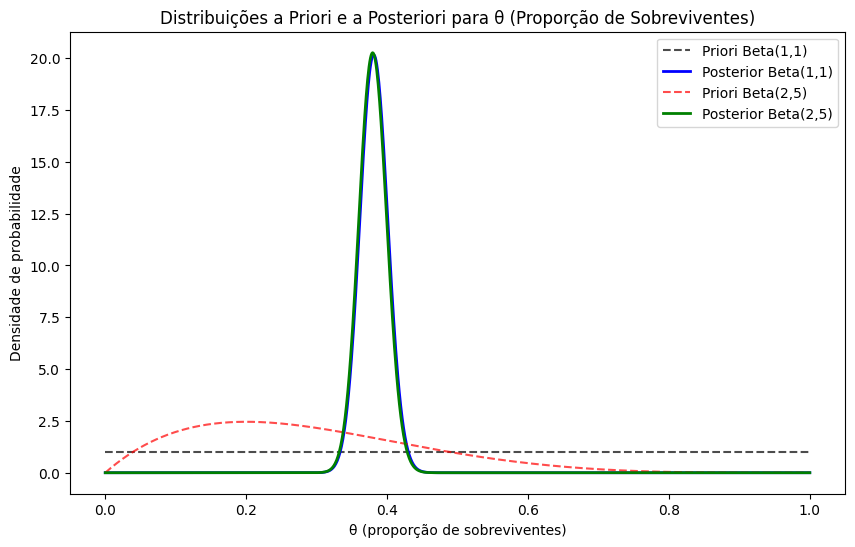

In [26]:
#letra b
import matplotlib.pyplot as plt
from scipy.stats import beta

#valores de theta
theta_values = np.linspace(0, 1, 1000)

#calcular a densidade das distribuições
prior_1 = beta.pdf(theta_values, a1, b1)
posterior_1 = beta.pdf(theta_values, a1_post, b1_post)

prior_2 = beta.pdf(theta_values, a2, b2)
posterior_2 = beta.pdf(theta_values, a2_post, b2_post)

#plot
plt.figure(figsize=(10,6))

#priori Beta(1,1) e posterior
plt.plot(theta_values, prior_1, 'k--', label='Priori Beta(1,1)', alpha=0.7)
plt.plot(theta_values, posterior_1, 'b-', label='Posterior Beta(1,1)', linewidth=2)

#priori Beta(2,5) e posterior
plt.plot(theta_values, prior_2, 'r--', label='Priori Beta(2,5)', alpha=0.7)
plt.plot(theta_values, posterior_2, 'g-', label='Posterior Beta(2,5)', linewidth=2)

plt.title("Distribuições a Priori e a Posteriori para θ (Proporção de Sobreviventes)")
plt.xlabel("θ (proporção de sobreviventes)")
plt.ylabel("Densidade de probabilidade")
plt.legend()
plt.show()


**Explicação:** O código visualiza as distribuições a priori e a posteriori para a proporção de sobreviventes no Titanic (θ). Utilizando a biblioteca `scipy.stats`, o código calcula as distribuições Beta a priori (Beta(1,1) e Beta(2,5)) e as distribuições a posteriori, ajustadas pelos dados observados. O gráfico gerado mostra as distribuições a priori e a posteriori para cada caso, permitindo comparar como as evidências empíricas (dados de sobreviventes) alteram nossas crenças iniciais sobre a proporção de sobreviventes.

**Comparação e interpretação do gráfico:** 

A priori Beta(1,1) é uma distribuição uniforme, constante, o que indica que, antes de observar os dados, consideramos todas as proporções de sobreviventes igualmente prováveis. No entanto, a posteriori Beta(1,1) apresenta um comportamento mais interessante: ela começa constante, atinge um pico em torno de 20% de sobreviventes e depois decai, indicando que os dados observados favorecem uma proporção de sobreviventes próxima a esse valor, mas com incerteza considerável.

Por outro lado, a priori Beta(2,5) começa com uma forma assimétrica, favorecendo proporções de sobreviventes mais baixas, refletindo a crença de que poucos passageiros sobreviveram. A posteriori Beta(2,5), no entanto, se sobrepõe à posteriori Beta(1,1), o que sugere que, embora a priori tenha favorecido uma taxa baixa de sobreviventes, os dados observados indicam uma proporção de sobreviventes mais alta. Isso mostra como a evidência empírica pode corrigir ou ajustar as crenças iniciais sobre a proporção de sobreviventes, independentemente da forma da distribuição a priori.



**4. Estatísticas da posteriori**

(a) Calcule a média e o intervalo de credibilidade de 95% para θ, em cada cenário.

(b) Interprete os resultados obtidos, considerando o contexto do problema.

In [28]:
#medias
mean_1 = beta.mean(a1_post, b1_post)
mean_2 = beta.mean(a2_post, b2_post)
ci_1 = beta.interval(0.95, a1_post, b1_post)
ci_2 = beta.interval(0.95, a2_post, b1_post)

print(f"Para a priori Beta(1,1) - Média Posteriori: {mean_1:.4f}, Intervalo de Credibilidade (95%): {ci_1}")
print(f"Para a priori Beta(2,5) - Média Posteriori: {mean_2:.4f}, Intervalo de Credibilidade (95%): {ci_2}")


Para a priori Beta(1,1) - Média Posteriori: 0.3814, Intervalo de Credibilidade (95%): (0.3430762116239797, 0.4205212343844384)
Para a priori Beta(2,5) - Média Posteriori: 0.3799, Intervalo de Credibilidade (95%): (0.344108655572574, 0.4215293905251424)


**Explicação:** O código calcula a média de θ com ```beta.mean``` e o intervalo de credibilidade de 95% com ```beta.interval```. A média fornece nossa melhor estimativa para a proporção de sobreviventes, enquanto o intervalo de credibilidade de 95% nos dá a faixa de valores onde θ tem 95% de probabilidade de estar. 

**Interpretação:**

Para a distribuição a priori Beta(1,1), a média da posteriori é de aproximadamente **0.381** e o intervalo de credibilidade de 95% é de **[0.343, 0.421]**. Isso significa que, dado os dados observados, estimamos que a proporção de sobreviventes no Titanic seja em torno de 38%, com um intervalo de confiança de 95% variando entre 34% e 42%.
  
Para a distribuição a priori Beta(2,5), a média da posteriori é de **0.380** e o intervalo de credibilidade de 95% é de **[0.342, 0.419]**. Embora a priori tenha favorecido uma taxa mais baixa de sobreviventes, a evidência dos dados resultou em uma estimativa muito semelhante à obtida com a priori Beta(1,1), com a proporção de sobreviventes também em torno de 38%.

Em termos de interpretação, os dois modelos indicam que a proporção de sobreviventes no Titanic está em torno de 38%, com um intervalo de credibilidade de 95% variando entre 34% e 42%. Isso sugere que, mesmo com diferentes suposições iniciais (a priori), os dados observados indicam uma estimativa de sobrevivência bastante consistente.



**5. Discussão**

Discuta como as diferentes escolhas de priori influenciaram os resultados. Em que contextos o uso da abordagem bayesiana pode ser mais adequado do que abordagens frequentistas?

**Reposta:** As diferentes escolhas de distribuições a priori influenciam bastante os resultados da posteriori, pois elas refletem as nossas crenças iniciais sobre a proporção de sobreviventes no Titanic antes de termos os dados. A priori Beta(1,1), que é uma distribuição uniforme, basicamente assume que qualquer valor de θ (proporção de sobreviventes) tem a mesma chance de ser o correto antes de observarmos os dados. Isso nos deu uma estimativa de cerca de 38% de sobreviventes, com um intervalo de credibilidade entre 34% e 42%. Por outro lado, a priori Beta(2,5), que parte do princípio de que a maioria dos passageiros provavelmente não sobreviveu, foi mais "restritiva". Mesmo assim, a evidência dos dados acabou resultando em uma estimativa de sobreviventes bem parecida com a Beta(1,1). Isso mostra como, no caso do Titanic, os dados têm um impacto muito grande nas estimativas finais, até mesmo ajustando as crenças iniciais.

A abordagem bayesiana é bem útil quando queremos considerar informações ou crenças que já temos antes de olhar os dados, como nas distribuições a priori mais informativas. Ela permite que ajustemos essas crenças conforme vamos recebendo mais dados, combinando tanto o que já sabemos quanto o que os dados nos dizem. Essa abordagem é importante em contextos onde as evidências históricas são limitadas ou quando informações prévias são essenciais para o modelo, como em estudos médicos ou quando temos amostras pequenas. Já a inferência frequentista é um pouco mais rígida, tratando os parâmetros como fixos e baseando as inferências apenas nos dados observados. Isso pode ser um problema quando há incertezas ou quando precisamos incorporar informações externas de forma mais flexível.

